In [34]:
import os
import pandas as pd
path = 'D:\\elice_python\\GAS_5\\pytest_machine\\'

os.chdir(path)

In [5]:
df = pd.read_csv(os.path.join(path, 'knn.csv'))
print(df.head())
print(df.shape)
print(df.info())

      x1     x2    y
0   9.96  4.600  1.0
1  11.00 -0.168  0.0
2  11.50  5.210  1.0
3   8.69  1.540  0.0
4   8.11  4.290  0.0
(26, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      26 non-null     float64
 1   x2      26 non-null     float64
 2   y       26 non-null     float64
dtypes: float64(3)
memory usage: 752.0 bytes
None


독립변수와 종속변수 분리

In [6]:
X = df.iloc[:,:2]
y = df.iloc[:,2]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
y_test.head()

9     1.0
7     0.0
6     1.0
12    0.0
1     0.0
Name: y, dtype: float64

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [12]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
preds = model.predict(X_test)
print(preds)

[1. 0. 1. 0. 0. 1. 1.]


In [15]:
print(model.score(X_test,y_test))

1.0


In [16]:
import matplotlib.pyplot as plt
train_accuracy = []
test_accuracy = []
n_neighbors_settings = range(1,11)

for n_n in n_neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=n_n)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

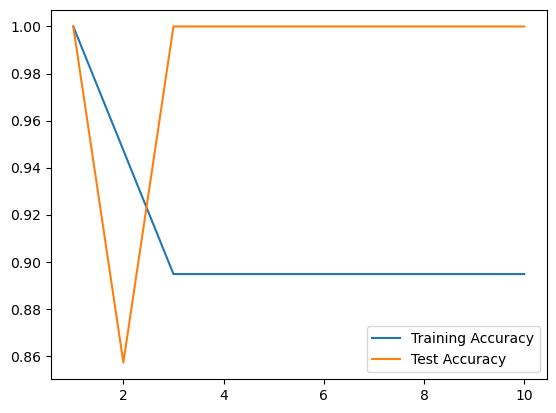

In [20]:
plt.plot(n_neighbors_settings,train_accuracy, label = 'Training Accuracy')
plt.plot(n_neighbors_settings,test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.show()

## KNN Regressor
- KNN은 연속된 숫자를 에측하는 회귀 상황에도 쓰일 수 있다.
- K개의 이웃이 가진 값의 평균을 구한다.

In [36]:
data = pd.read_csv(os.path.join(path,'wave.csv'))
print(data.head())
print()
print(data.shape)
print()
print(data.info())

       x      y
0 -0.753 -0.448
1  2.700  0.331
2  1.390  0.779
3  0.592  0.035
4 -2.060 -1.390

(40, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       40 non-null     float64
 1   y       40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes
None


In [37]:
x = data.iloc[:,0]
y = data.iloc[:,1]

print(type(x),type(y))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [38]:
# x = x.to_frame()
# y = y.to_frame()

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
model_reg = KNeighborsRegressor(n_neighbors=3)
model_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
type(model_reg)

sklearn.neighbors._regression.KNeighborsRegressor

In [43]:
print(f'prediction : {model_reg.predict(x_test)}')
print(round(model_reg.score(x_test,y_test), 3))

prediction : [[-1.375     ]
 [-1.35466667]
 [ 1.39133333]
 [-1.35466667]
 [ 0.409     ]
 [-1.35466667]
 [-0.11646667]
 [-1.89333333]
 [-1.35466667]
 [ 0.03883333]]
0.917


이때, 성능평가 지표는 $R^2$ score 이다

### 연습문제 1

In [101]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt


path = 'D:\\elice_python\\GAS_5\\pytest_machine\\'

In [102]:
df = pd.read_csv(os.path.join(path, 'cancer.csv'))

In [103]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,18.0,10.4,123.0,1000.0,0.1180,0.2780,0.3000,0.1470,0.242,0.0787,...,17.3,185.0,2020.0,0.162,0.666,0.712,0.265,0.460,0.1190,0.0
1,20.6,17.8,133.0,1330.0,0.0847,0.0786,0.0869,0.0702,0.181,0.0567,...,23.4,159.0,1960.0,0.124,0.187,0.242,0.186,0.275,0.0890,0.0
2,19.7,21.3,130.0,1200.0,0.1100,0.1600,0.1970,0.1280,0.207,0.0600,...,25.5,153.0,1710.0,0.144,0.424,0.450,0.243,0.361,0.0876,0.0
3,11.4,20.4,77.6,386.0,0.1420,0.2840,0.2410,0.1050,0.260,0.0974,...,26.5,98.9,568.0,0.210,0.866,0.687,0.258,0.664,0.1730,0.0
4,20.3,14.3,135.0,1300.0,0.1000,0.1330,0.1980,0.1040,0.181,0.0588,...,16.7,152.0,1580.0,0.137,0.205,0.400,0.163,0.236,0.0768,0.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [105]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]



In [106]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
preds = model.predict(X_test)
print(preds)

[1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.]


In [110]:
print(model.score(X_test, y_test))


0.916083916083916


In [122]:
train_accuracy = []
test_accuracy = []
n_neighbors_settings = range(1,31)
for i in n_neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))
    
print(train_accuracy)
print(test_accuracy)

[1.0, 0.9671361502347418, 0.9624413145539906, 0.9507042253521126, 0.9460093896713615, 0.9413145539906104, 0.9342723004694836, 0.9366197183098591, 0.931924882629108, 0.931924882629108, 0.9389671361502347, 0.9413145539906104, 0.9342723004694836, 0.931924882629108, 0.9295774647887324, 0.931924882629108, 0.9342723004694836, 0.9366197183098591, 0.9342723004694836, 0.9366197183098591, 0.9342723004694836, 0.9342723004694836, 0.931924882629108, 0.9342723004694836, 0.9295774647887324, 0.9295774647887324, 0.9272300469483568, 0.9248826291079812, 0.9225352112676056, 0.9225352112676056]
[0.9370629370629371, 0.8951048951048951, 0.916083916083916, 0.9020979020979021, 0.916083916083916, 0.9230769230769231, 0.9440559440559441, 0.9370629370629371, 0.9440559440559441, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.9440559440559441, 0.951048951048951, 0.9440559440559441, 0.9440559440559441, 0.951048951048951, 0.9440559440559441, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048

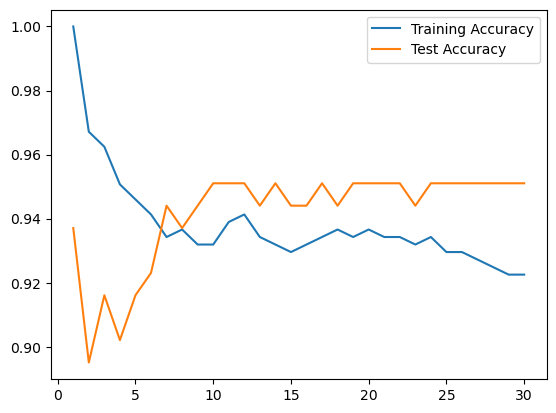

In [123]:
plt.plot(n_neighbors_settings,train_accuracy, label = 'Training Accuracy')
plt.plot(n_neighbors_settings,test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.show()

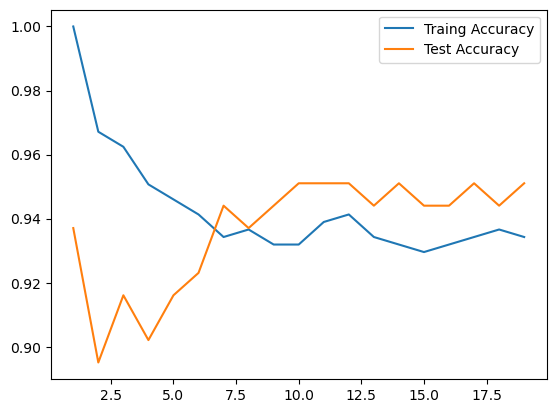

In [113]:
# 윤주현
X = df.iloc[:, 0:30]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = KNeighborsClassifier(n_neighbors=3)

import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
n_neighbors_settings = range(1, 20)

for n_neighbors in n_neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    

plt.plot(n_neighbors_settings, train_accuracy, label='Traing Accuracy')
plt.plot(n_neighbors_settings, test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.show()

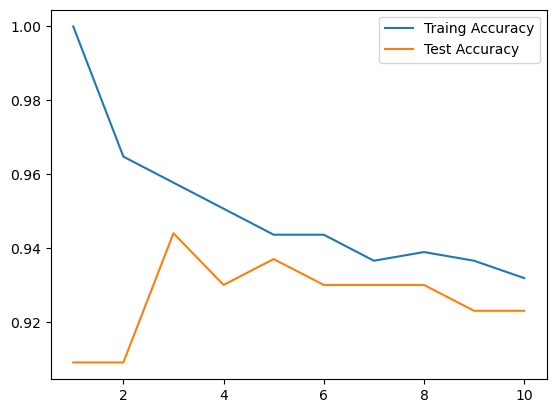

In [125]:
# 전형주
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import  matplotlib.pyplot as plt
import os

path = 'D:\\elice_python\\GAS_5\\pytest_machine\\'
data = pd.read_csv(os.path.join(path, 'cancer.csv'))
#print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
#독립변수와 종속변수 분리

# print(X.head())  #데이터 확인
# print(y.head())
# print(X.shape)  
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y)
#독립변수와 종속변수를 각각 train데이터와 test데이터로 분리

train_accuracy = []
test_accuracy = []

n_neighbors_settings = range(1,11)
#1부터 10의 수를 변수에 할당

for n_neighbors in n_neighbors_settings:
#n_neighbors 파라미터를 1부터 10까지 경우의 훈련 정확도와 테스트 정확도를
#각각 train_accuracy와 test_accuracy에 저장
    model = KNeighborsClassifier(n_neighbors=n_neighbors) #모델 객체 생성
    model.fit(X_train,y_train) #train 데이터를 통해 훈련
    train_accuracy.append(model.score(X_train,y_train)) #훈련 정확도
    test_accuracy.append(model.score(X_test,y_test)) #테스트 정확도

plt.plot(n_neighbors_settings,train_accuracy,label = "Traing Accuracy")
plt.plot(n_neighbors_settings,test_accuracy,label = "Test Accuracy")
#n_neighbors의 수치를 각각 1부터 10까지로 설정해 나온 훈련 정확도와 테스트 정확도 그래프를 그림
plt.legend()
plt.show()

### 연습문제 2

In [131]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

path = 'D:\\elice_python\\GAS_5\\pytest_machine\\'
df = pd.read_csv(os.path.join(path, 'reg.csv'))

In [132]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x96,x97,x98,x99,x100,x101,x102,x103,x104,y
0,0.000000,0.18,0.0678,0.0,0.315,0.578,0.642,0.269,0.0000,0.2080,...,0.0597,0.2080,0.01870,0.0825,0.287,0.0258,1.000,0.0897,0.00804,24.0
1,0.000236,0.00,0.2420,0.0,0.173,0.548,0.783,0.349,0.0435,0.1050,...,0.0581,0.1050,0.02150,0.3060,0.553,0.1130,1.000,0.2040,0.04180,21.6
2,0.000236,0.00,0.2420,0.0,0.173,0.694,0.599,0.349,0.0435,0.1050,...,0.0581,0.1040,0.00666,0.3060,0.548,0.0351,0.980,0.0628,0.00403,34.7
3,0.000293,0.00,0.0630,0.0,0.150,0.659,0.442,0.449,0.0870,0.0668,...,0.0433,0.0664,0.00223,0.4210,0.645,0.0217,0.989,0.0332,0.00111,33.4
4,0.000705,0.00,0.0630,0.0,0.150,0.687,0.528,0.449,0.0870,0.0668,...,0.0433,0.0668,0.00664,0.4210,0.649,0.0645,1.000,0.0993,0.00987,36.2


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 105 entries, x1 to y
dtypes: float64(105)
memory usage: 415.2 KB


In [134]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [144]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 104), (379,), (127, 104), (127,))

In [151]:
train_accuracy = []
test_accuracy = []
n_neighbors_settings = range(1,100)

for n_n in n_neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_n)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

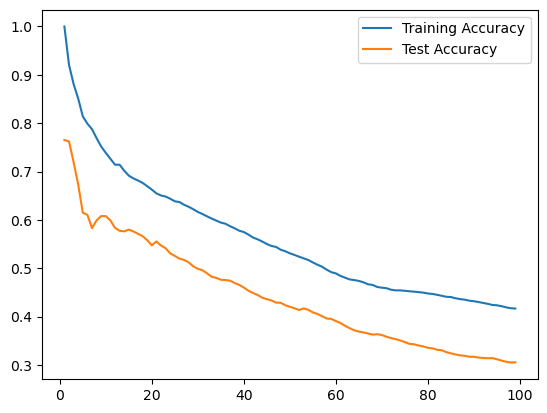

In [152]:
plt.plot(n_neighbors_settings,train_accuracy, label = 'Training Accuracy')
plt.plot(n_neighbors_settings,test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.show()